In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape


(8807, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [9]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)


show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [10]:
# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)

# Drop rows where title or type is missing
df.dropna(subset=['title', 'type'], inplace=True)


C:\Users\Geeth\AppData\Local\Temp\ipykernel_46032\3619357867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
C:\Users\Geeth\AppData\Local\Temp\ipykernel_46032\3619357867.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

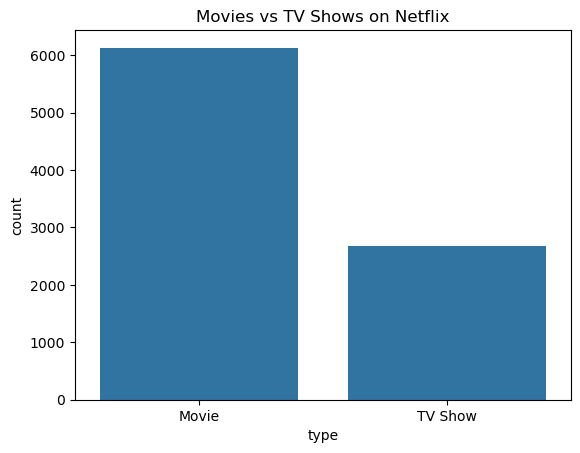

In [11]:
df['type'].value_counts()
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


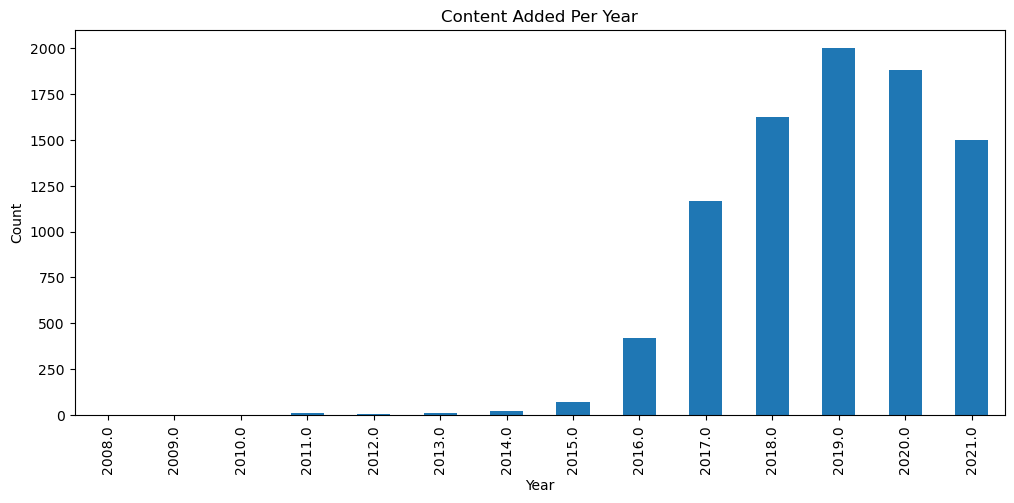

In [12]:
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


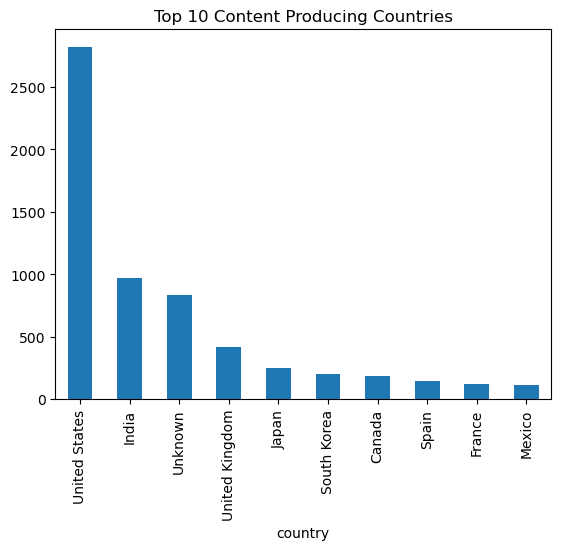

In [13]:
df['country'].value_counts().head(10)
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Producing Countries")
plt.show()


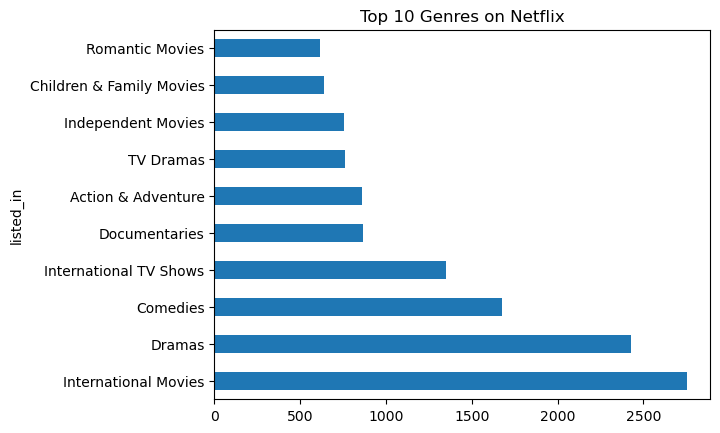

In [14]:
# Split genres
genres = df['listed_in'].str.split(', ').explode()
genres.value_counts().head(10)
genres.value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.show()


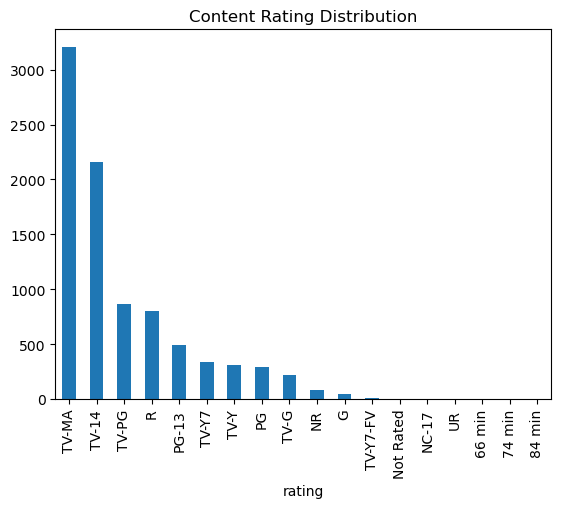

In [15]:
df['rating'].value_counts()
df['rating'].value_counts().plot(kind='bar')
plt.title("Content Rating Distribution")
plt.show()


C:\Users\Geeth\AppData\Local\Temp\ipykernel_46032\3567418224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


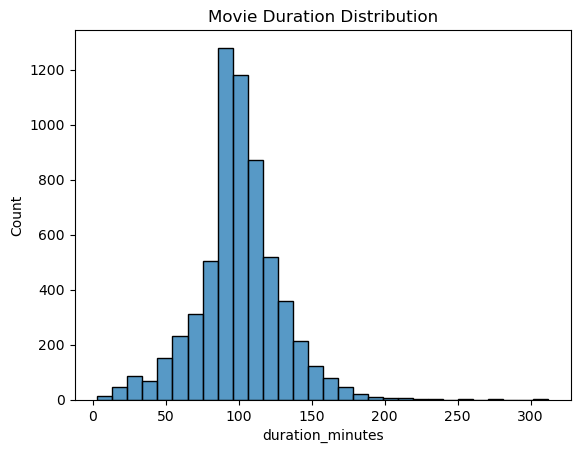

In [16]:
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)
sns.histplot(movies['duration_minutes'], bins=30)
plt.title("Movie Duration Distribution")
plt.show()


C:\Users\Geeth\AppData\Local\Temp\ipykernel_46032\133587910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['seasons'] = tv['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


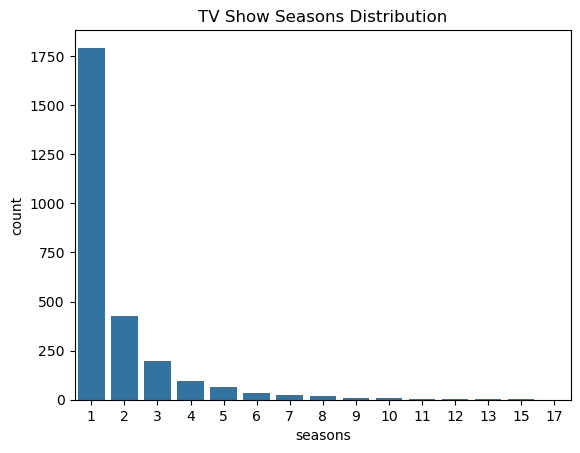

In [17]:
tv = df[df['type'] == 'TV Show']
tv['seasons'] = tv['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)
sns.countplot(x=tv['seasons'])
plt.title("TV Show Seasons Distribution")
plt.show()


In [18]:
df['director'].value_counts().head(10)
    

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [19]:
cast = df['cast'].dropna().str.split(', ').explode()
cast.value_counts().head(10)


cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [20]:
df.to_csv("netflix_cleaned.csv", index=False)
